In [1]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd
import os

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [2]:
# Loading the personnal access token
TOKEN = "YOUR_TOKEN_HERE"

QUERY_ROOT = "https://api.github.com"
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [3]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv('rust-lang_rust/rust-lang_rust.csv')
print(df.columns)
df


Index(['contributor', 'bothunter'], dtype='object')


,contributor,bothunter
0,unexge,Human
1,clarfonthey,Human
2,saethlin,Human
3,japaric,Human
4,jdm,Human
5,ms178,Human
6,rustbot,Bot
7,rust-log-analyzer,Bot
8,m-ou-se,Human
9,Aaron1011,Human


In [4]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
contributors = df.contributor.to_list()
print(contributors)

['unexge', 'clarfonthey', 'saethlin', 'japaric', 'jdm', 'ms178', 'rustbot', 'rust-log-analyzer', 'm-ou-se', 'Aaron1011', 'smoelius', 'jackh726', 'kennytm', 'dependabot[bot]', 'pnkfelix', 'jsha', 'froystig', 'gilescope', 'aochagavia', 'Xiretza', 'leoyvens', 'bors', 'alexcrichton', 'aliemjay', 'matklad', 'rylev', 'taiki-e', 'sooneeatwork', 'Nadrieril', 'lnicola', 'HTGAzureX1212', 'bluss', 'msullivan', 'bjorn3', 'llogiq', 'ojeda', 'rust-timer', 'tshepang', 'willcrichton', 'Young-Flash']


In [5]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_list_dict = []
for contributor in tqdm(contributors):
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    app_list_dict.append({'contributor': contributor, 'app': json_response['type'] == 'Bot'})

app_df = pd.DataFrame.from_dict(app_list_dict)

# Replace True values with 'Bot' and False values with 'Human'
app_df

100%|██████████| 40/40 [00:13<00:00,  2.97it/s]


,contributor,app
0,unexge,False
1,clarfonthey,False
2,saethlin,False
3,japaric,False
4,jdm,False
5,ms178,False
6,rustbot,False
7,rust-log-analyzer,False
8,m-ou-se,False
9,Aaron1011,False


### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [6]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df = pd.merge(df, app_df, on='contributor')
df

,contributor,bothunter,app
0,unexge,Human,False
1,clarfonthey,Human,False
2,saethlin,Human,False
3,japaric,Human,False
4,jdm,Human,False
5,ms178,Human,False
6,rustbot,Bot,False
7,rust-log-analyzer,Bot,False
8,m-ou-se,Human,False
9,Aaron1011,Human,False


### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [7]:
app_counts = df['app'].value_counts()
print(f"Total number of GitHub Apps: {app_counts[True]}")
print(f"Total number of User accounts: {app_counts[False]}")

Total number of GitHub Apps: 1
Total number of User accounts: 39


## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [8]:
# YOUR CODE BELOW
import subprocess

# Put the login names of the dataframe in a txt file
contributors = df['contributor']
for contributor in contributors:
    with open('logins.txt', 'a') as f:
        f.write(contributor + '\n')

bodegha_df = pd.read_csv('rust-lang_rust/bodegha.csv')

In [9]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW
bodegha_df = bodegha_df.rename(columns={'account': 'contributor', 'prediction': 'bodegha'})[['contributor', 'bodegha']]

# Left join the two dataframes. And replace NaN with 'Unknown'
df_predictions = pd.merge(df, bodegha_df, on='contributor', how='left')
df_predictions['bodegha'] = df_predictions['bodegha'].fillna('Unknown')
df_predictions

,contributor,bothunter,app,bodegha
0,unexge,Human,False,Unknown
1,clarfonthey,Human,False,Human
2,saethlin,Human,False,Human
3,japaric,Human,False,Unknown
4,jdm,Human,False,Unknown
5,ms178,Human,False,Unknown
6,rustbot,Bot,False,Human
7,rust-log-analyzer,Bot,False,Human
8,m-ou-se,Human,False,Human
9,Aaron1011,Human,False,Unknown


In [10]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW
rabbit_df = pd.read_csv('rust-lang_rust/rabbit.csv')

In [11]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
rabbit_df = rabbit_df.rename(columns={'account': 'contributor', 'prediction': 'rabbit'})[['contributor', 'rabbit']]
df_predictions = pd.merge(df_predictions, rabbit_df, on='contributor', how='left')
df_predictions

,contributor,bothunter,app,bodegha,rabbit
0,unexge,Human,False,Unknown,human
1,clarfonthey,Human,False,Human,human
2,saethlin,Human,False,Human,human
3,japaric,Human,False,Unknown,human
4,jdm,Human,False,Unknown,human
5,ms178,Human,False,Unknown,bot
6,rustbot,Bot,False,Human,bot
7,rust-log-analyzer,Bot,False,Human,bot
8,m-ou-se,Human,False,Human,human
9,Aaron1011,Human,False,Unknown,human


In [12]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency

# YOUR CODE BELOW
df_predictions['rabbit'] = df_predictions['rabbit'].replace({'bot': 'Bot', 'app': 'Bot', 'human': 'Human', 'unknown': 'Unknown'})
df_predictions

,contributor,bothunter,app,bodegha,rabbit
0,unexge,Human,False,Unknown,Human
1,clarfonthey,Human,False,Human,Human
2,saethlin,Human,False,Human,Human
3,japaric,Human,False,Unknown,Human
4,jdm,Human,False,Unknown,Human
5,ms178,Human,False,Unknown,Bot
6,rustbot,Bot,False,Human,Bot
7,rust-log-analyzer,Bot,False,Human,Bot
8,m-ou-se,Human,False,Human,Human
9,Aaron1011,Human,False,Unknown,Human


### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [13]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW
df_manual = pd.read_csv('rust-lang_rust/manual.csv')

In [14]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW
df_predictions = pd.merge(df_predictions, df_manual, on='contributor')
df_predictions

,contributor,bothunter,app,bodegha,rabbit,manual
0,unexge,Human,False,Unknown,Human,Human
1,clarfonthey,Human,False,Human,Human,Human
2,saethlin,Human,False,Human,Human,Human
3,japaric,Human,False,Unknown,Human,Human
4,jdm,Human,False,Unknown,Human,Human
5,ms178,Human,False,Unknown,Bot,Bot
6,rustbot,Bot,False,Human,Bot,Bot
7,rust-log-analyzer,Bot,False,Human,Bot,Bot
8,m-ou-se,Human,False,Human,Human,Human
9,Aaron1011,Human,False,Unknown,Human,Human


### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [15]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW

### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [16]:
df1 = aggregate_raters(np.array(df_predictions[['bothunter', 'rabbit']]))
kappa = fleiss_kappa(df1[0])
print(f"Kappa: {kappa}")

Kappa: 0.8945981554677206


#### b. between bothunter and bodegha

In [17]:
df2 = aggregate_raters(np.array(df_predictions[['bothunter', 'bodegha']]))
kappa = fleiss_kappa(df2[0])
print(f"Kappa: {kappa}")

Kappa: -0.12030553787396554


#### c. between bodegha and rabbit

In [18]:
df3 = aggregate_raters(np.array(df_predictions[['bodegha', 'rabbit']]))
kappa = fleiss_kappa(df3[0])
print(f"Kappa: {kappa}")

Kappa: -0.0891089108910892


#### d. between bothunter, bodegha and rabbit

In [19]:
df4 = aggregate_raters(np.array(df_predictions[['bothunter', 'bodegha', 'rabbit']]))
kappa = fleiss_kappa(df3[0])
print(f"Kappa: {kappa}")

Kappa: -0.0891089108910892


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [20]:
# With Rabbit and BotHunter, there is a perfect agreement (kappa=0.89).
# But when you add Bodegha to any, there is no more agreement (kappa<0).
# It seems that Bodegha isn't quite useful compared to Rabbit and BotHunter.

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [21]:
# I would use Rabbit or BotHunter. But certainly not Bodegha.

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.

In [22]:
# YOUR CODE BELOW
events = []
for contributor in tqdm(contributors):
    for page in (1, 2, 3):
        query = f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}'
        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        for event in json_response:
            events.append({'event_id': event['id'], 'contributor': event['actor']['login'], 'repo_name': event['repo']['name'], 'event_type': event['type'], 'created_at': event['created_at']})

df_events = pd.DataFrame.from_dict(events)
df_events

100%|██████████| 40/40 [01:16<00:00,  1.91s/it]


,event_id,contributor,repo_name,event_type,created_at
0,36968540620,unexge,microsoft/regorus,IssueCommentEvent,2024-03-28T13:50:14Z
1,36911466927,unexge,bytedance/monoio,WatchEvent,2024-03-26T23:43:27Z
2,36740456263,unexge,getgrit/gritql,WatchEvent,2024-03-20T23:00:21Z
3,36738092740,unexge,martinvonz/jj,WatchEvent,2024-03-20T21:16:26Z
4,36738031178,unexge,lnx-search/lnx,WatchEvent,2024-03-20T21:13:58Z
...,...,...,...,...,...
9591,35179762445,Young-Flash,Young-Flash/rust-analyzer,PushEvent,2024-01-28T10:49:18Z
9592,35169710205,Young-Flash,Young-Flash/rust-analyzer,CreateEvent,2024-01-27T13:20:34Z
9593,35169531658,Young-Flash,Young-Flash/rust-analyzer,PushEvent,2024-01-27T13:01:25Z
9594,35169379173,Young-Flash,Young-Flash/rust-analyzer,DeleteEvent,2024-01-27T12:47:01Z


### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [23]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [24]:
# YOUR CODE BELOW
# Define a function to assign event group based on event type
def assign_event_group(event):
    if event in issue_group:
        return 'Issues'
    elif event in pr_group:
        return 'Pull Requests'
    elif event in commit_group:
        return 'Commits'
    else:
        return 'Repository'

# Apply the function to the 'event_type' column to create a new 'event_group' column
df_events['event_group'] = df_events['event_type'].apply(assign_event_group)

# Group by 'contributor' and 'event_group', count the number of events, and reset index
grouped_df = df_events.groupby(['contributor', 'event_group']).size().reset_index(name='count')

# Pivot the DataFrame
pivot_df = grouped_df.pivot(index='contributor', columns='event_group', values='count').reset_index()

# Merge with the 'type' field from the DataFrame from Section 4 (assuming it's named df_section4)
final_df = pd.merge(pivot_df, df_predictions[['contributor', 'manual']], on='contributor', how='left')

# Rename manual to type
final_df = final_df.rename(columns={'manual': 'type'})

final_df

,contributor,Commits,Issues,Pull Requests,Repository,type
0,Aaron1011,77.0,37.0,78.0,99.0,Human
1,HTGAzureX1212,154.0,8.0,55.0,41.0,Human
2,Nadrieril,43.0,79.0,74.0,87.0,Human
3,Xiretza,8.0,23.0,15.0,19.0,Human
4,Young-Flash,116.0,61.0,42.0,67.0,Human
5,alexcrichton,39.0,83.0,83.0,93.0,Human
6,aliemjay,NaN,29.0,10.0,12.0,Human
7,aochagavia,62.0,39.0,41.0,57.0,Human
8,bjorn3,28.0,99.0,74.0,79.0,Human
9,bluss,100.0,77.0,47.0,71.0,Human


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [25]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [26]:
# YOUR CODE BELOW
medians = []
for event_group in final_df.columns[1:-1]:
    # Redo the median calculation for Bot App but filter the event group to match the type
    medians.append({'event_group': event_group, 'median': final_df[final_df['type'] == 'Human'][event_group].median(), 'type': 'Human'})
    medians.append({'event_group': event_group, 'median': final_df[final_df['type'] == 'Bot'][event_group].median(), 'type': 'Bot_app'})

df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,Commits,53.0,Human
1,Commits,118.5,Bot_app
2,Issues,47.0,Human
3,Issues,79.0,Bot_app
4,Pull Requests,48.5,Human
5,Pull Requests,55.0,Bot_app
6,Repository,73.5,Human
7,Repository,99.0,Bot_app


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [27]:
# Main DataFrame
# medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
#           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
#           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
#           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
#           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
#           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
#           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
#           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
# df_medians = pd.DataFrame.from_dict(medians)
# df_medians

<Axes: xlabel='type', ylabel='event_group'>

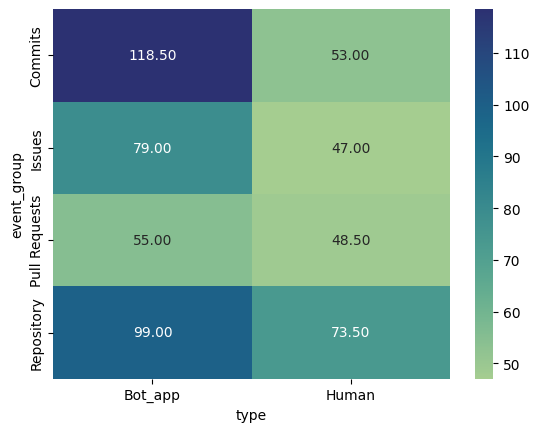

In [28]:
# YOUR CODE BELOW
sns.heatmap(df_medians[['event_group', 'median', 'type']].pivot(index='event_group', columns='type', values='median'), annot=True, fmt=".2f", cmap='crest')

#### What is the difference that you observe between Bots+Apps and Humans?

In [29]:
# In every aspect, the Bot App contributors are more active than the Human contributors.

#### What is the differnce that you observe between Event groups?

In [30]:
# Humans tend to modify the repository more often than making commits, pull requests, or issues.
# Whereas Bot Apps tend to make more commits than modifying the repository, making pull requests, or issues.

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [31]:
# Except the significant difference between activity, the tendency over the event groups has no correlation between Bot Apps and Humans.

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

<Axes: ylabel='Pull Requests'>

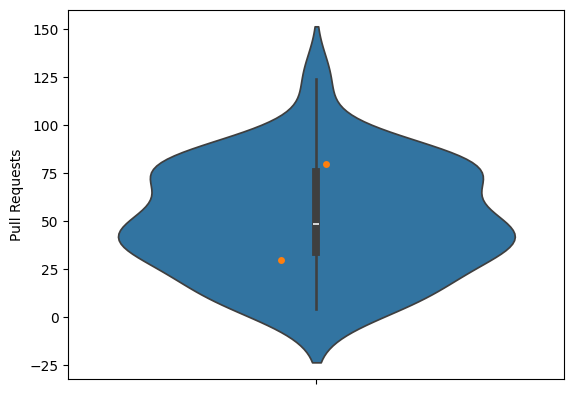

In [32]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
sns.violinplot(data=final_df, y='Pull Requests')
sns.stripplot(data=final_df[final_df.type == "Bot"], y='Pull Requests')

# It looks like we have two normal laws with different means and variances.
# The bots are not outliers and are part of the distribution of the humans. 

<Axes: ylabel='Issues'>

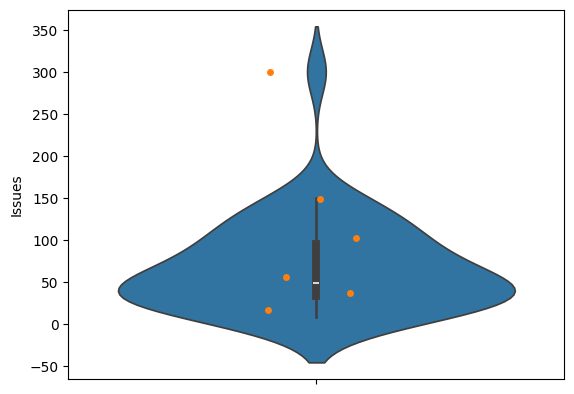

In [33]:
# YOUR CODE BELOW - Visualise number of events from issue event group
sns.violinplot(data=final_df, y='Issues')
sns.stripplot(data=final_df[final_df.type == "Bot"], y='Issues')

# It does not look like a normal distribution. And there is a big outlier that is a bot.

<Axes: ylabel='Commits'>

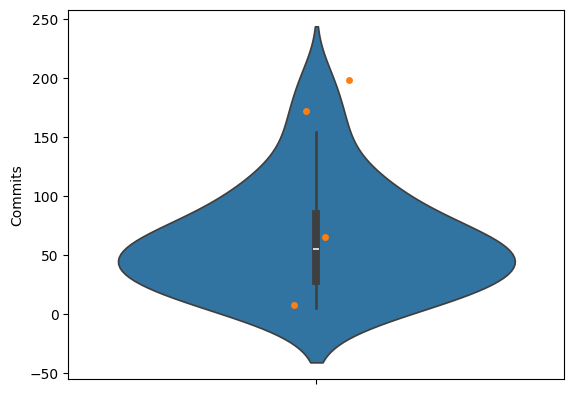

In [34]:
# YOUR CODE BELOW - Visualise number of events from commit event group
sns.violinplot(data=final_df, y='Commits')
sns.stripplot(data=final_df[final_df.type == "Bot"], y='Commits')

# It looks like a skewed normal distribution and the two outliers that may 
# be the cause are bots.

<Axes: ylabel='Repository'>

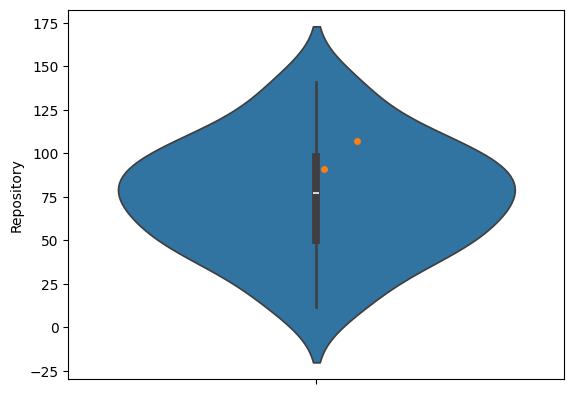

In [35]:
# YOUR CODE BELOW - Visualise number of events from repo event group
sns.violinplot(data=final_df, y='Repository')
sns.stripplot(data=final_df[final_df.type == "Bot"], y='Repository')

# This one looks like a perfect normal distribution. And the bots are not outliers.

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [36]:
# YOUR CODE BELOW
for event_group in ["Commits", "Issues", "Pull Requests", "Repository"]:
    # Remove NaN values
    print(f"{event_group}: {shapiro(final_df[event_group].dropna())}")

Commits: ShapiroResult(statistic=0.9113726019859314, pvalue=0.006197560578584671)
Issues: ShapiroResult(statistic=0.8279675245285034, pvalue=3.345795630593784e-05)
Pull Requests: ShapiroResult(statistic=0.9565717577934265, pvalue=0.16821280121803284)
Repository: ShapiroResult(statistic=0.985261082649231, pvalue=0.9029174447059631)


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [48]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind
# YOUR CODE BELOW
event_groups = ["Commits", "Issues", "Pull Requests", "Repository"]

# Iterate over all pairs of event groups
for i in range(len(event_groups)):
    for j in range(i+1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        # Perform Shapiro-Wilk test for both event groups
        _, p1 = shapiro(final_df[group1].dropna())
        _, p2 = shapiro(final_df[group2].dropna())
        
        # If H0 is rejected in Shapiro-Wilk test for either group, use Mann-Whitney U test
        if p1 < 0.05 or p2 < 0.05:
            _, p = mannwhitneyu(final_df[group1].dropna(), final_df[group2].dropna(), method='exact', nan_policy='omit')
            test = 'Mann-Whitney U'
        # If H0 is not rejected in Shapiro-Wilk test for both groups, use independent t-test
        else:
            _, p = ttest_ind(final_df[group1].dropna(), final_df[group2].dropna(), nan_policy='omit')
            test = 'Independent t-test'
        
        # Print the results
        print(f"Test between {group1} and {group2} using {test}: p-value = {p}")


Test between Commits and Issues using Mann-Whitney U: p-value = 0.9341349076188578
Test between Commits and Pull Requests using Mann-Whitney U: p-value = 0.4653960421062216
Test between Commits and Repository using Mann-Whitney U: p-value = 0.06274594216720716
Test between Issues and Pull Requests using Mann-Whitney U: p-value = 0.3131244607358998
Test between Issues and Repository using Mann-Whitney U: p-value = 0.10610672946444755
Test between Pull Requests and Repository using Independent t-test: p-value = 0.0010712192442202566


### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [49]:
import cliffsDelta
# YOU CODE BELOW
event_groups = ["Commits", "Issues", "Pull Requests", "Repository"]

# Iterate over all pairs of event groups
for i in range(len(event_groups)):
    for j in range(i+1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        # Perform Shapiro-Wilk test for both event groups
        _, p1 = shapiro(final_df[group1].dropna())
        _, p2 = shapiro(final_df[group2].dropna())
        
        # If H0 is rejected in Shapiro-Wilk test for either group, use Mann-Whitney U test
        if p1 < 0.05 or p2 < 0.05:
            _, p = mannwhitneyu(final_df[group1].dropna(), final_df[group2].dropna(), method='exact', nan_policy='omit')
            test = 'Mann-Whitney U'
        # If H0 is not rejected in Shapiro-Wilk test for both groups, use independent t-test
        else:
            _, p = ttest_ind(final_df[group1].dropna(), final_df[group2].dropna(), nan_policy='omit')
            test = 'Independent t-test'
        
        # If H0 is rejected, calculate Cliff's Delta
        if p < 0.01:
            delta, size = cliffsDelta.cliffsDelta(final_df[group1].dropna().tolist(), final_df[group2].dropna().tolist())
            print(f"Cliff's Delta between {group1} and {group2}: delta = {delta}, size = {size}")


Cliff's Delta between Pull Requests and Repository: delta = -0.4351851851851852, size = medium


### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [164]:
import seaborn as sns
# YOUR CODE BELOW - function for seaborn plot
import matplotlib.pyplot as plt

def create_violinplot(data, x=None, y=None, hue=None):
    # Create a violin plot
    sns.violinplot(data=data, x=x, y=y, hue=hue)

    # Create a strip plot for the Bot type using rabbit's predictions
    sns.stripplot(data=data[data.type == "Bot"], x=x, y=y, hue=hue, color='orange')

# This df is used for events
df_merge = df_events.merge(final_df, on='contributor')
# Count the number of events performed by each contributor and store it into a new column
df_merge['event_count'] = 1
df_merge = df_merge.groupby(['contributor', 'type', 'event_type']).count().reset_index()

df_merge

,contributor,type,event_type,event_id,repo_name,created_at,event_group,Commits,Issues,Pull Requests,Repository,event_count
0,Aaron1011,Human,CommitCommentEvent,1,1,1,1,1,1,1,1,1
1,Aaron1011,Human,CreateEvent,29,29,29,29,29,29,29,29,29
2,Aaron1011,Human,DeleteEvent,7,7,7,7,7,7,7,7,7
3,Aaron1011,Human,ForkEvent,2,2,2,2,2,2,2,2,2
4,Aaron1011,Human,IssueCommentEvent,26,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...
318,willcrichton,Human,PullRequestEvent,36,36,36,36,36,36,36,36,36
319,willcrichton,Human,PullRequestReviewCommentEvent,5,5,5,5,5,5,5,5,5
320,willcrichton,Human,PullRequestReviewEvent,3,3,3,3,3,3,3,3,3
321,willcrichton,Human,PushEvent,96,96,96,96,96,96,96,96,96


In [165]:
# This df is used for means
df_mean = final_df.melt(id_vars=['contributor', 'type'], value_vars=event_groups, var_name='event_group', value_name='value')
df_mean

,contributor,type,event_group,value
0,Aaron1011,Human,Commits,77.0
1,HTGAzureX1212,Human,Commits,154.0
2,Nadrieril,Human,Commits,43.0
3,Xiretza,Human,Commits,8.0
4,Young-Flash,Human,Commits,116.0
...,...,...,...,...
155,sooneeatwork,Human,Repository,45.0
156,taiki-e,Human,Repository,141.0
157,tshepang,Human,Repository,115.0
158,unexge,Human,Repository,59.0


#### Total number of events

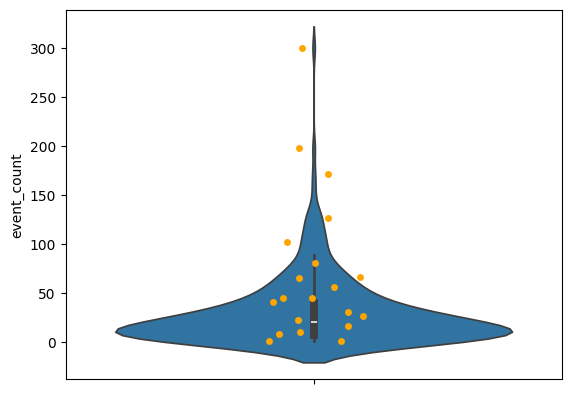

In [160]:
# YOUR CODE BELOW
create_violinplot(df_merge, y='event_count')

#### Number of event types

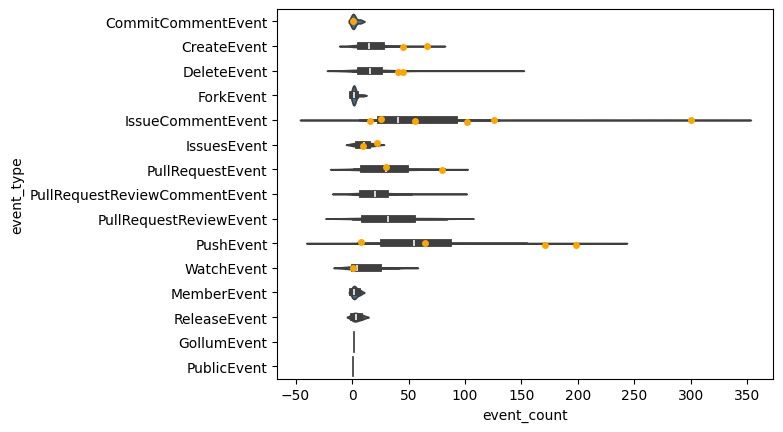

In [161]:
# YOUR CODE BELOW
create_violinplot(df_merge, y='event_type', x='event_count')

#### Mean number of events per event group

/tmp/nix-shell.AvICZQ/ipykernel_19373/278841512.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.stripplot(data=data[data.type == "Bot"], x=x, y=y, hue=hue, color='orange')


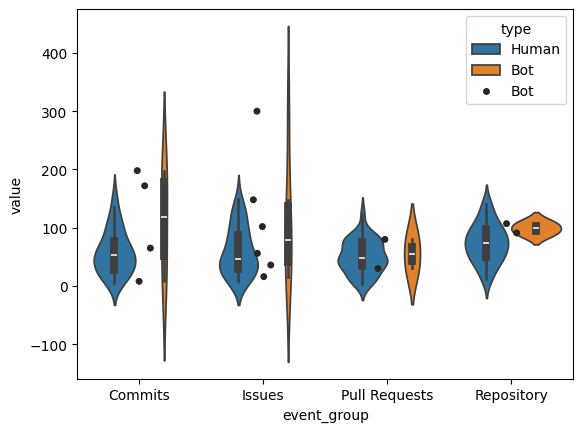

In [170]:
# YOUR CODE BELOW

create_violinplot(df_mean, y='value', x='event_group'

#### Gini coeﬃcient of time between consecutive event

In [134]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [135]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

/tmp/nix-shell.AvICZQ/ipykernel_19373/747497074.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))


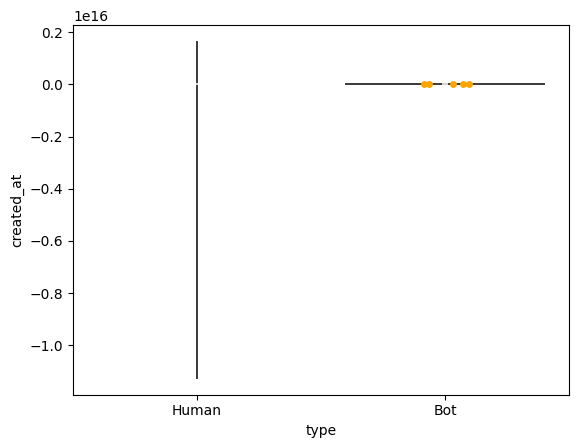

In [178]:
# YOUR CODE BELOW

# Convert created_at to datetime
df_merge['created_at'] = pd.to_datetime(df_merge['created_at'])

# Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'
gini_df = df_merge.groupby('contributor')['created_at'].agg(gini).reset_index()

# Merge the resultant DataFrame with their type
gini_df = gini_df.merge(final_df[['contributor', 'type']], on='contributor', how='left')

# Make box/boxen/violin plots on those gini values
create_violinplot(gini_df, y='created_at', x='type')

### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

In [ ]:
# The most prominent outliers are in the commits event group. This seems logic since some bots are automated to make commits.

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

In [ ]:
# Bots, they have a more limited use than humans. This can be clearly seen in the event type violin plot. 
# Suspected bots are never seen doing some types of events (Pull request review, pull request review comment, fork event, member event)

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

In [ ]:
# I only have a bot category.

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

In [ ]:
# I only have a bot category.

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?

In [183]:
# The plots made cannot answer that question. They don't link the contributor's name to the distribution of the events.